# Make imports and define random seed

In [1]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from collections import defaultdict
from pathlib import Path
import os
import itertools 
import numpy as np
import random

In [2]:
seed =1380
np.random.seed(seed)
random.seed(seed) 
os.environ['PYTHONHASHSEED']=str(seed)

# Write paths to splits and to cobre data

In [3]:
abide_splits_path ="abide_splits_new.json"

In [4]:
subjects_path =abide_raw_data ="C:/Users/ZenBook/Desktop/shiza/abide/abide3/csv/data_updated"

# Open our splits

In [5]:
with open(abide_splits_path, 'r') as f:
    data_json = json.load(f)

# Preprocessing

In [6]:
def get_data(abide_data):
    del abide_data['Unnamed: 0']
    data_dict ={}
    for i,column in enumerate(abide_data.columns):
        for j in range(0,i):
            data_dict[(column, abide_data.columns[j])] =abide_data.iloc[i,j]
    return data_dict        

# Adding an "id" key to the dict_data

In [7]:
data =[]
for path in Path(subjects_path).iterdir():
    if ".csv" in str(path):
        print(path)
        abide_data =pd.read_csv(path)
        print(abide_data.shape)
        dict_data =get_data(abide_data)
        dict_data["id"] =path.stem
        data.append(dict_data)

C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50003_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50004_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50005_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50006_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50007_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50008_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50009_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50010_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50011_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50012_updated.csv
(201, 201)
C:\Users\ZenBook\Desktop\shiza\abide\abide3\csv\data_updated\50013_updated.csv
(201, 201)
C:\Users\Z

# Check id column

In [8]:
dataset =pd.DataFrame.from_records(data)
dataset['id']

0       50003_updated
1       50004_updated
2       50005_updated
3       50006_updated
4       50007_updated
            ...      
1030    51583_updated
1031    51584_updated
1032    51585_updated
1033    51606_updated
1034    51607_updated
Name: id, Length: 1035, dtype: object

# Remove "_updated"

In [9]:
dataset['id'] = dataset['id'].apply(lambda x : x[:-8])
dataset['id']

0       50003
1       50004
2       50005
3       50006
4       50007
        ...  
1030    51583
1031    51584
1032    51585
1033    51606
1034    51607
Name: id, Length: 1035, dtype: object

# Upload targets¶

In [10]:
meta_data =pd.read_csv("Phenotypic_V1_0b_preprocessed1.csv")

In [11]:
meta_data =meta_data[['subject', 'DX_GROUP']]

In [12]:
meta_data=meta_data.drop_duplicates()

In [13]:
meta_data["subject"] = meta_data["subject"].astype(str)
dataset = dataset.merge(meta_data, left_on="id", right_on="subject")
dataset

,"(2lANG, 1lIOG)","(3lPRECU, 1lIOG)","(3lPRECU, 2lANG)","(4lINS, 1lIOG)","(4lINS, 2lANG)","(4lINS, 3lPRECU)","(5lANT, 1lIOG)","(5lANT, 2lANG)","(5lANT, 3lPRECU)","(5lANT, 4lINS)",...,"(200lTTG, 193rSFG)","(200lTTG, 194rMIDB)","(200lTTG, 195rLING)","(200lTTG, 196lINS)","(200lTTG, 197lPRECU)","(200lTTG, 198rFUS)","(200lTTG, 199lBRAINS)",id,subject,DX_GROUP
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231,50003,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021,50004,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647,50005,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353,50007,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494,51583,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.611222,0.403865,0.587582,0.769098,0.749381,0.199042,0.232190,51584,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,0.052481,0.012144,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.029752,0.090660,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,51606,1


# Check that our feature names are string names

In [14]:
# get the current column names
current_columns = list(dataset.columns)

# create new column names as strings
new_columns = [str(col) for col in current_columns]

# assign the new column names to the DataFrame
dataset.columns = new_columns

In [15]:
# convert the "subject" column in meta_data to string
meta_data["subject"] = meta_data["subject"].astype(str)

# merge the meta_data and dataset DataFrames
dataset = dataset.merge(meta_data, left_on="id", right_on="subject")

# check if all column names in dataset are strings
if all(isinstance(col, str) for col in dataset.columns):
    print("All feature names have string names.")
else:
    print("Not all feature names have string names.")

All feature names have string names.


In [16]:
dataset

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')",id,subject_x,DX_GROUP_x,subject_y,DX_GROUP_y
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.583384,0.612280,0.611907,0.538509,0.384231,50003,50003,1,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.284047,0.434542,0.287794,0.373621,0.074021,50004,50004,1,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,0.006335,0.060822,0.216242,0.214382,0.101647,50005,50005,1,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,50006,1,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.551425,0.675391,0.407957,0.144519,0.368353,50007,50007,1,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.636486,0.587029,0.640850,0.172182,0.173494,51583,51583,1,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.587582,0.769098,0.749381,0.199042,0.232190,51584,51584,1,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,51585,1,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,51606,1,51606,1


In [17]:
dataset = dataset.drop(["subject_y", "DX_GROUP_y"], axis=1)
dataset

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '193rSFG')","('200lTTG', '194rMIDB')","('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')",id,subject_x,DX_GROUP_x
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231,50003,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021,50004,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647,50005,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353,50007,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494,51583,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.611222,0.403865,0.587582,0.769098,0.749381,0.199042,0.232190,51584,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,0.052481,0.012144,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.029752,0.090660,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,51606,1


In [18]:
dataset = dataset.rename(columns={"subject_x": "subject", "DX_GROUP_x": "DX_GROUP"})

In [19]:
dataset

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '193rSFG')","('200lTTG', '194rMIDB')","('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')",id,subject,DX_GROUP
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231,50003,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021,50004,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647,50005,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353,50007,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494,51583,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.611222,0.403865,0.587582,0.769098,0.749381,0.199042,0.232190,51584,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,0.052481,0.012144,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.029752,0.090660,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,51606,1


In [20]:
dataset = dataset.drop(["subject"], axis=1)
dataset

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '192lCEREB')","('200lTTG', '193rSFG')","('200lTTG', '194rMIDB')","('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')",id,DX_GROUP
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.284841,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.244641,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,-0.016630,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.278487,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.457806,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.426724,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.570735,0.611222,0.403865,0.587582,0.769098,0.749381,0.199042,0.232190,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,-0.020682,0.052481,0.012144,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.074726,0.029752,0.090660,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,1


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Split the dataset into features and labels
X = dataset.iloc[:, :-2]
y = dataset.iloc[:, -1]

# Perform feature selection with SelectKBest
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get the names of the top 10 features
all_feature_names = list(X.columns)
top_feature_indices = selector.get_support(indices=True)
top_feature_names = [all_feature_names[i] for i in top_feature_indices]
print("Top 10 feature names:")
for feature in top_feature_names:
    print(feature)

Top 10 feature names:
('104lFP', '72lMTG')
('109rFP', '58rPRECU')
('140rMTG', '3lPRECU')
('140rMTG', '5lANT')
('140rMTG', '19lPRECU')
('140rMTG', '82lANG')
('140rMTG', '91lMEDFG')
('140rMTG', '104lFP')
('174lPRECU', '109rFP')
('174lPRECU', '140rMTG')


In [22]:
dataset.to_csv("abide.csv", index=False)

In [23]:
for i, elem in enumerate(data_json['train']):
    train_ids =elem['train']
    valid_ids =elem['valid']
    
    print("----------------")

----------------
----------------
----------------
----------------
----------------


In [24]:
dataset

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '192lCEREB')","('200lTTG', '193rSFG')","('200lTTG', '194rMIDB')","('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')",id,DX_GROUP
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.284841,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231,50003,1
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.244641,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021,50004,1
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,-0.016630,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647,50005,1
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.278487,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877,50006,1
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.457806,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353,50007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.426724,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494,51583,1
1031,0.647871,0.603541,0.800223,0.467764,0.635632,0.598331,0.359808,0.680179,0.573806,0.700266,...,0.570735,0.611222,0.403865,0.587582,0.769098,0.749381,0.199042,0.232190,51584,1
1032,-0.125803,0.098669,0.507789,0.157499,-0.160850,-0.048438,0.078523,0.297165,0.268022,0.374893,...,-0.020682,0.052481,0.012144,0.097749,0.675332,0.267334,0.052142,-0.114129,51585,1
1033,-0.161647,-0.164564,0.521032,0.180170,0.123443,0.015346,-0.157460,0.107673,0.323614,-0.190746,...,0.074726,0.029752,0.090660,0.248957,-0.084061,0.367068,0.177178,-0.029479,51606,1


In [25]:
dataset['DX_GROUP']

0       1
1       1
2       1
3       1
4       1
       ..
1030    1
1031    1
1032    1
1033    1
1034    1
Name: DX_GROUP, Length: 1035, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder


y = dataset['DX_GROUP']

# Verify that classes are properly encoded
print("Unique values of y:", np.unique(y))

Unique values of y: [1 2]


# Logistic regression

In [105]:
hyperparameters = {'class_weight': ["balanced", None],
                   'C': [0.01, 0.1, 1, 3, 10],
                   'random_state': [1380]
                  }

In [106]:
keys, values = zip(*hyperparameters.items())
hyperparameter_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [107]:
def splits_data(dataset, split):
    train_ids, valid_ids =split['train'],split['valid']

    train_data =dataset.loc[dataset.id.isin(train_ids)]
    val_data =dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val =val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val

In [108]:
X_train, y_train, X_val, y_val =splits_data(dataset, data_json['train'][0])

In [109]:
X_train

,"('2lANG', '1lIOG')","('3lPRECU', '1lIOG')","('3lPRECU', '2lANG')","('4lINS', '1lIOG')","('4lINS', '2lANG')","('4lINS', '3lPRECU')","('5lANT', '1lIOG')","('5lANT', '2lANG')","('5lANT', '3lPRECU')","('5lANT', '4lINS')",...,"('200lTTG', '190rBRAINS')","('200lTTG', '191lSFG')","('200lTTG', '192lCEREB')","('200lTTG', '193rSFG')","('200lTTG', '194rMIDB')","('200lTTG', '195rLING')","('200lTTG', '196lINS')","('200lTTG', '197lPRECU')","('200lTTG', '198rFUS')","('200lTTG', '199lBRAINS')"
0,0.549521,0.610648,0.592684,0.340560,0.202072,0.501893,0.294064,0.404200,0.544056,0.370781,...,0.299152,0.452802,0.284841,0.616293,0.219040,0.583384,0.612280,0.611907,0.538509,0.384231
1,0.296498,0.192646,0.185122,0.181146,0.047346,0.199650,0.099630,0.198493,0.457405,0.178522,...,0.209933,0.362702,0.244641,0.225772,0.265055,0.284047,0.434542,0.287794,0.373621,0.074021
2,0.180952,0.467731,0.485879,0.226380,0.198987,0.019950,0.389510,0.606995,0.630783,0.200740,...,0.110277,0.031548,-0.016630,-0.144969,0.287438,0.006335,0.060822,0.216242,0.214382,0.101647
3,-0.088143,0.150425,0.298771,0.396140,0.036510,0.158230,-0.098585,0.491055,0.412058,0.142467,...,0.251153,-0.169557,0.278487,0.200416,0.209798,0.404898,0.206064,0.066367,0.432752,-0.064877
4,0.240236,0.216042,0.335634,0.488252,0.425265,0.333273,0.318955,0.581848,0.257819,0.597403,...,0.368949,0.474675,0.457806,0.232860,0.207357,0.551425,0.675391,0.407957,0.144519,0.368353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,0.154959,0.045999,0.535689,0.407417,0.194568,0.037575,0.215792,0.513108,0.560384,0.080279,...,0.251331,0.195964,0.598200,0.082696,0.204427,0.587853,0.427971,0.694242,0.225019,0.178390
1027,0.620986,0.604404,0.689694,0.377407,0.510856,0.500717,0.545810,0.570296,0.646999,0.496390,...,0.584777,0.241399,0.542910,0.333348,0.352625,0.674683,0.751379,0.651204,0.353388,0.396357
1029,0.405249,0.217528,0.471382,0.279075,0.174587,0.088619,0.537919,0.740282,0.382195,0.227798,...,0.254716,0.533498,0.423885,0.231406,-0.067024,0.398445,0.276193,0.382012,0.261710,0.006212
1030,0.462507,0.378398,0.563866,0.477662,0.341000,0.298473,0.534328,0.610895,0.402820,0.458759,...,0.130320,0.517794,0.426724,0.434671,0.086819,0.636486,0.587029,0.640850,0.172182,0.173494


In [110]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1026    1
1027    1
1029    1
1030    1
1034    1
Name: DX_GROUP, Length: 662, dtype: int64

# Define f1 macro

In [111]:
from sklearn.metrics import f1_score

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [112]:
results = []
for hyperparameter in hyperparameter_combinations:
    record, f1_metrics, accs = {}, [], []
    record['hyperparameter'] = hyperparameter
    for i, split in enumerate(data_json['train']):
        X_train, y_train, X_val, y_val = splits_data(dataset, split)
        print(hyperparameter)
        lr = LogisticRegression(**hyperparameter)
        lr.fit(X_train, y_train)
        predicted_val = lr.predict(X_val)
        f1_metric = f1(y_val, predicted_val)
        f1_metrics.append(f1_metric)

    record['f1_mean'] = np.mean(f1_metrics) 
    record['f1_std'] = np.std(f1_metrics) 
    results.append(record)

{'class_weight': 'balanced', 'C': 0.01, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01, 'random_state': 1380}
{'class_weight': 'balanced', 'C': 0.01, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01, 'random_state': 1380}
{'class_weight': None, 'C': 0.01, 'random_state': 1380}
{'class_weight': None, 'C': 0.01, 'random_state': 1380}
{'class_weight': None, 'C': 0.01, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01, 'random_state': 1380}
{'class_weight': None, 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10, 'random_state': 1380}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Standart f1

In [36]:
results =[]
for hyperparameter in hyperparameter_combinations:
    record,f1_metrics, accs ={}, [], []
    record['hyperparameter'] =hyperparameter
    for i, split in enumerate(data_json['train']):
        X_train, y_train, X_val, y_val =splits_data(dataset, split)
        print(hyperparameter)
        lr =LogisticRegression(**hyperparameter)
        lr.fit(X_train,y_train)
        predicted_val =lr.predict(X_val)
        f1_metric =f1_score(y_val,predicted_val)
        f1_metrics.append(f1_metric)

    record['f1_mean'] =  np.mean(f1_metrics) 
    record['f1_std'] =  np.std(f1_metrics) 
    results.append(record)

{'class_weight': 'balanced', 'C': 0.01}
{'class_weight': 'balanced', 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.01}
{'class_weight': 'balanced', 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': 'balanced', 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01}
{'class_weight': None, 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.01}
{'class_weight': None, 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 0.1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 1}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 3}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10}
{'class_weight': None, 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'class_weight': None, 'C': 10}


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Print features #1

In [113]:
# Print feature importance
importance = np.abs(lr.coef_[0])
feature_names = X_train.columns
indices = np.argsort(importance)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importance[indices[f]]))

Feature ranking:
1. ('62rFUS', '39rMTG') (0.284670)
2. ('170rSOG', '160lANT') (0.246434)
3. ('150lIOG', '23lMFG') (0.245734)
4. ('62rFUS', '49rMTG') (0.243035)
5. ('183lFP', '42lFP') (0.240565)
6. ('94rCAU', '68rMIDB') (0.233812)
7. ('125lMFG', '42lFP') (0.227997)
8. ('122lPARAH', '87rFUS') (0.227843)
9. ('12rFP', '3lPRECU') (0.226425)
10. ('170rSOG', '64rMFG') (0.224917)
11. ('167lIFG', '42lFP') (0.223320)
12. ('32rTP', '11lMTG') (0.222412)
13. ('84lCAU', '68rMIDB') (0.222165)
14. ('155rPARAH', '32rTP') (0.219764)
15. ('176rCEREB', '86rBRAINSTEM') (0.218973)
16. ('199lBRAINS', '48rPARAH') (0.217825)
17. ('170rSOG', '51lANT') (0.215494)
18. ('111rPRECE', '39rMTG') (0.212886)
19. ('161rSFG', '20lINS') (0.211310)
20. ('10rCEREB', '9lCEREB') (0.210630)
21. ('176rCEREB', '87rFUS') (0.208398)
22. ('78lTP', '20lINS') (0.206932)
23. ('78lTP', '22rANT') (0.206025)
24. ('174lPRECU', '170rSOG') (0.205863)
25. ('56lANG', '14rANG') (0.204812)
26. ('53rFOG', '38rMFG') (0.203472)
27. ('136lSOG', '81

In [114]:
pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]

hyperparameter    {'class_weight': None, 'C': 10, 'random_state'...
f1_mean                                                    0.659416
f1_std                                                     0.016675
Name: 9, dtype: object

In [115]:
best_params =pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]['hyperparameter']

In [116]:
best_params

{'class_weight': None, 'C': 10, 'random_state': 1380}

# Evaluating on test (f1 macro)

In [120]:
f1_metrics, roc_aucs, accs = [], [], []

for split in data_json['train']:
    train_ids, val_ids, test_ids = split['train'], split['valid'], data_json['test']

    train_data = dataset.loc[dataset.id.isin(train_ids)]
    test_data = dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train = train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_test, y_test = test_data.iloc[:,:-2], test_data.iloc[:,-1]

    lr = LogisticRegression(**best_params)
    lr.fit(X_train, y_train)
    predicted_test = lr.predict(X_test)

    f1_metric = f1_score(y_test, predicted_test, average='macro')
    acc_metric = accuracy_score(y_test, predicted_test)
    roc_auc = roc_auc_score(y_test, predicted_test)

    print(f"f1 macro: {f1_metric}, accuracy: {acc_metric}, roc auc: {roc_auc}")

    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 macro: 0.6713058098262656, accuracy: 0.6714975845410628, roc auc: 0.6713058098262655


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 macro: 0.66182785660941, accuracy: 0.6618357487922706, roc auc: 0.6623388753969736


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 macro: 0.6859903381642511, accuracy: 0.6859903381642513, roc auc: 0.6863908088922099


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 macro: 0.6511889159333458, accuracy: 0.6521739130434783, roc auc: 0.6538389688025407
f1 macro: 0.6521657953696789, accuracy: 0.6521739130434783, roc auc: 0.6526713992153932


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate on standart f1

In [41]:
f1_metrics, roc_aucs, accs=[], [], []
for i, split in enumerate(data_json['train']):
    train_ids,val_ids, test_ids =split['train'],split['valid'], data_json['test']

    train_data =dataset.loc[dataset.id.isin(train_ids)]
    test_data =dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_test, y_test =test_data.iloc[:,:-2], test_data.iloc[:,-1]
    lr =LogisticRegression(**best_params)
    lr.fit(X_train,y_train)
    predicted_test =lr.predict(X_test)
    f1_metric =f1_score(y_test,predicted_test)
    acc_metric =accuracy_score(y_test,predicted_test)
    roc_auc =roc_auc_score(y_test,predicted_test)
    print(f1_metric ,acc_metric, roc_auc)
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7980295566502462 0.8019323671497585 0.8019334952363161


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7843137254901961 0.7874396135265701 0.7875490379226603


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8 0.8019323671497585 0.8021670091537456


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8285714285714286 0.8260869565217391 0.8269194844012704


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8078817733990149 0.8115942028985508 0.8116009714178966


In [121]:
np.mean(f1_metrics)

0.6644957431805902

In [122]:
np.std(f1_metrics)

0.012997011228699073

In [123]:
np.mean(accs)

0.6647342995169083

In [124]:
np.std(accs)

0.012817873585914597

In [125]:
np.mean(roc_aucs)

0.6653091724266765

In [126]:
np.std(roc_aucs)

0.01249397137447249

# Another splits (train_ids+val_ids)

In [48]:
f1_metrics, roc_aucs, accs=[], [], []
for i, split in enumerate(data_json['train']):
    train_ids,val_ids, test_ids =split['train'],split['valid'], data_json['test']

    train_data =dataset.loc[dataset.id.isin(train_ids+val_ids)]
    test_data =dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_test, y_test =test_data.iloc[:,:-2], test_data.iloc[:,-1]
    lr =LogisticRegression(**best_params)
    lr.fit(X_train,y_train)
    predicted_test =lr.predict(X_test)
    f1_metric =f1_score(y_test,predicted_test)
    acc_metric =accuracy_score(y_test,predicted_test)
    roc_auc =roc_auc_score(y_test,predicted_test)
    print(f1_metric ,acc_metric, roc_auc)
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7738693467336683 0.782608695652174 0.7821315150382963


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7738693467336683 0.782608695652174 0.7821315150382963


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7738693467336683 0.782608695652174 0.7821315150382963


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7738693467336683 0.782608695652174 0.7821315150382963


C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7738693467336683 0.782608695652174 0.7821315150382963


# Random Forest

In [104]:
hyperparameters = {'n_estimators': [10, 50, 100],
                   'max_depth':  [3,5,7,9],
                   'random_state': [1380]                   
                  }

In [105]:
keys, values = zip(*hyperparameters.items())
hyperparameter_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [106]:
def splits_data(dataset, split):
    train_ids, valid_ids =split['train'],split['valid']

    train_data =dataset.loc[dataset.id.isin(train_ids)]
    val_data =dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val =val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def splits_data(dataset, split):
    train_ids, valid_ids =split['train'],split['valid']

    train_data =dataset.loc[dataset.id.isin(train_ids)]
    val_data =dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val =val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val

results = []
for hyperparameter in hyperparameter_combinations:
    record, f1_metrics, accs = {}, [], []
    record['hyperparameter'] = hyperparameter
    for i, split in enumerate(data_json['train']):
        X_train, y_train, X_val, y_val = splits_data(dataset, split)
        print(hyperparameter)
        rf = RandomForestClassifier(**hyperparameter)
        rf.fit(X_train, y_train)
        predicted_val = rf.predict(X_val)
        f1_metric = f1_score(y_val, predicted_val)
        f1_metrics.append(f1_metric)

    record['f1_mean'] = np.mean(f1_metrics)
    record['f1_std'] = np.std(f1_metrics)
    results.append(record)


{'n_estimators': 10, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 5}
{'n_estimators': 10, 'max_depth': 5}
{'n_estimators': 10, 'max_depth': 5}
{'n_estimators': 10, 'max_depth': 5}
{'n_estimators': 10, 'max_depth': 5}
{'n_estimators': 10, 'max_depth': 7}
{'n_estimators': 10, 'max_depth': 7}
{'n_estimators': 10, 'max_depth': 7}
{'n_estimators': 10, 'max_depth': 7}
{'n_estimators': 10, 'max_depth': 7}
{'n_estimators': 10, 'max_depth': 9}
{'n_estimators': 10, 'max_depth': 9}
{'n_estimators': 10, 'max_depth': 9}
{'n_estimators': 10, 'max_depth': 9}
{'n_estimators': 10, 'max_depth': 9}
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 5}
{'n_estimators': 50, 'max_depth': 5}
{

In [111]:
pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]

hyperparameter    {'n_estimators': 50, 'max_depth': 3, 'class_we...
f1_mean                                                    0.615171
f1_std                                                     0.166889
Name: 11, dtype: object

In [108]:
best_params =pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]['hyperparameter']

In [109]:
best_params

{'n_estimators': 100, 'max_depth': 3}

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

f1_metrics, roc_aucs, accs = [], [], []

for i, split in enumerate(data_json['train']):
    train_ids, val_ids, test_ids = split['train'], split['valid'], data_json['test']

    train_data = dataset.loc[dataset.id.isin(train_ids)]
    test_data = dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1]
    X_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1]

    # Initialize the random forest classifier with best hyperparameters
    rf = RandomForestClassifier(n_estimators=100, max_depth=3)
    rf.fit(X_train, y_train)
    predicted_test = rf.predict(X_test)

    f1_metric = f1_score(y_test, predicted_test)
    acc_metric = accuracy_score(y_test, predicted_test)
    roc_auc = roc_auc_score(y_test, predicted_test)
    
    print(f1_metric, acc_metric, roc_auc)
    
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)


0.6772486772486773 0.7053140096618358 0.7036241359985055
0.6875 0.7101449275362319 0.70880814496544
0.6021505376344086 0.642512077294686 0.6404352699420885
0.6699507389162561 0.6763285024154589 0.6762563048757705
0.6031746031746031 0.6376811594202898 0.6359518027274426


In [113]:
np.mean(f1_metrics)

0.648004911394789

In [114]:
np.std(f1_metrics)

0.037440778140754555

In [115]:
np.mean(accs)

0.6743961352657004

In [116]:
np.std(accs)

0.030338779648517097

In [117]:
np.mean(roc_aucs)

0.6730151317018493

In [118]:
np.std(roc_aucs)

0.03054077239695768

# Another splits (train_ids+val_ids

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

f1_metrics, roc_aucs, accs = [], [], []

for i, split in enumerate(data_json['train']):
    train_ids, val_ids, test_ids = split['train'], split['valid'], data_json['test']

    train_data = dataset.loc[dataset.id.isin(train_ids + val_ids)]
    test_data = dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train = train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_test, y_test = test_data.iloc[:,:-2], test_data.iloc[:,-1]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=3) # specify the number of trees in the forest
    rf.fit(X_train, y_train)
    
    predicted_test = rf.predict(X_test)
    f1_metric = f1_score(y_test, predicted_test)
    acc_metric = accuracy_score(y_test, predicted_test)
    roc_auc = roc_auc_score(y_test, predicted_test)
    
    print(f1_metric, acc_metric, roc_auc)
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)

0.6170212765957447 0.6521739130434783 0.6503362600410985
0.6292134831460674 0.6811594202898551 0.6781711189986923
0.6842105263157896 0.7101449275362319 0.7085746310480104
0.6428571428571428 0.6618357487922706 0.6609377918923968
0.6428571428571428 0.6618357487922706 0.6609377918923968


# SVM

In [127]:
from sklearn import svm
from sklearn.svm import SVC

In [128]:
hyperparameters = {'C': [0.01, 0.1, 1, 10],
                   'kernel': ['linear', 'rbf'],
                   'random_state': [1380]
                  }

In [129]:
keys, values = zip(*hyperparameters.items())
hyperparameter_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [130]:
def splits_data(dataset, split):
    train_ids, valid_ids =split['train'],split['valid']

    train_data =dataset.loc[dataset.id.isin(train_ids)]
    val_data =dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val =val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val

In [131]:
def splits_data(dataset, split):
    train_ids, valid_ids = split['train'], split['valid']

    train_data = dataset.loc[dataset.id.isin(train_ids)]
    val_data = dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train = train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val = val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val

results = []
for hyperparameter in hyperparameter_combinations:
    record, f1_metrics, accs = {}, [], []
    record['hyperparameter'] = hyperparameter
    for i, split in enumerate(data_json['train']):
        X_train, y_train, X_val, y_val = splits_data(dataset, split)
        print(hyperparameter)
        svm = SVC(**hyperparameter)
        svm.fit(X_train, y_train)
        predicted_val = svm.predict(X_val)
        f1_metric = f1_score(y_val, predicted_val)
        f1_metrics.append(f1_metric)

    record['f1_mean'] = np.mean(f1_metrics)
    record['f1_std'] = np.std(f1_metrics)
    results.append(record)

{'C': 0.01, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.01, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.01, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.01, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.01, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.01, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.01, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.01, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.01, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.01, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.1, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.1, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.1, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.1, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.1, 'kernel': 'linear', 'random_state': 1380}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 1380}
{'C': 0.1,

In [132]:
pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]

hyperparameter    {'C': 10, 'kernel': 'rbf', 'random_state': 1380}
f1_mean                                                   0.658402
f1_std                                                    0.038844
Name: 7, dtype: object

In [133]:
best_params =pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]['hyperparameter']

In [134]:
best_params

{'C': 10, 'kernel': 'rbf', 'random_state': 1380}

In [135]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

f1_metrics, roc_aucs, accs = [], [], []

for i, split in enumerate(data_json['train']):
    train_ids, val_ids, test_ids = split['train'], split['valid'], data_json['test']

    train_data = dataset.loc[dataset.id.isin(train_ids)]
    test_data = dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1]
    X_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1]

    # Initialize the SVM classifier with best hyperparameters
    svm = SVC(C=0.1, kernel='linear', random_state=1380)
    svm.fit(X_train, y_train)
    predicted_test = svm.predict(X_test)

    f1_metric = f1_score(y_test, predicted_test)
    acc_metric = accuracy_score(y_test, predicted_test)
    roc_auc = roc_auc_score(y_test, predicted_test)
    
    print(f1_metric, acc_metric, roc_auc)
    
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)


0.6699029126213593 0.6714975845410628 0.6717728376611246
0.6540284360189573 0.6473429951690821 0.6481879320007472
0.6889952153110047 0.6859903381642513 0.6866243228096395
0.6728971962616823 0.6618357487922706 0.6630394171492621
0.6634615384615385 0.6618357487922706 0.6623388753969736


In [136]:
np.mean(f1_metrics)

0.6698570597349084

In [137]:
np.std(f1_metrics)

0.011549558888050942

In [138]:
np.mean(accs)

0.6657004830917875

In [139]:
np.std(accs)

0.012744836674659837

In [140]:
np.mean(roc_aucs)

0.6663926770035494

In [141]:
np.std(roc_aucs)

0.01262819084791884

# PCA+SVM

In [101]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
hyperparameters = {'C': [0.01, 0.1, 1, 10],
                   'kernel': ['linear', 'rbf'],
                   'class_weight': ["balanced", None],
                   'probability': [True],
                   'random_state': [1380]
                  }
keys, values = zip(*hyperparameters.items())
hyperparameter_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

def splits_data(dataset, split):
    train_ids, valid_ids =split['train'],split['valid']
    train_data =dataset.loc[dataset.id.isin(train_ids)]
    val_data =dataset.loc[dataset.id.isin(valid_ids)]
    X_train, y_train =train_data.iloc[:,:-2], train_data.iloc[:,-1]
    X_val, y_val =val_data.iloc[:,:-2], val_data.iloc[:,-1]
    return X_train, y_train, X_val, y_val

results = []
for hyperparameter in hyperparameter_combinations:
    record, f1_metrics, accs = {}, [], []
    record['hyperparameter'] = hyperparameter
    for i, split in enumerate(data_json['train']):
        X_train, y_train, X_val, y_val = splits_data(dataset, split)
        
        # Perform PCA on training data
        pca = PCA(n_components=500, whiten=True)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_val_pca = pca.transform(X_val)
        
        # Fit SVM model with hyperparameters
        svm = SVC(**hyperparameter)
        svm.fit(X_train_pca, y_train)
        
        # Predict and evaluate on validation data
        predicted_val = svm.predict(X_val_pca)
        f1_metric = f1_score(y_val, predicted_val)
        f1_metrics.append(f1_metric)

    record['f1_mean'] = np.mean(f1_metrics)
    record['f1_std'] = np.std(f1_metrics)
    results.append(record)

In [102]:
pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]

hyperparameter    {'C': 0.01, 'kernel': 'linear', 'class_weight'...
f1_mean                                                     0.66616
f1_std                                                     0.033875
Name: 15, dtype: object

In [103]:
best_params =pd.DataFrame.from_records(results).sort_values(by ="f1_mean").reset_index(drop=True).iloc[-1]['hyperparameter']

In [104]:
best_params

{'C': 0.01,
 'kernel': 'linear',
 'class_weight': None,
 'probability': True,
 'random_state': 1380}

In [105]:
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

f1_metrics, roc_aucs, accs = [], [], []

for i, split in enumerate(data_json['train']):
    train_ids, val_ids, test_ids = split['train'], split['valid'], data_json['test']

    train_data = dataset.loc[dataset.id.isin(train_ids)]
    test_data = dataset.loc[dataset.id.isin(test_ids)]
    X_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1]
    X_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1]
    
    # Apply PCA
    pca = PCA(n_components=500)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize the SVM classifier with best hyperparameters
    svm = SVC(C=0.1, kernel='linear', class_weight='balanced', probability=True, random_state=1380)
    svm.fit(X_train_pca, y_train)
    predicted_test = svm.predict(X_test_pca)

    f1_metric = f1_score(y_test, predicted_test)
    acc_metric = accuracy_score(y_test, predicted_test)
    roc_auc = roc_auc_score(y_test, predicted_test)
    
    print(f1_metric, acc_metric, roc_auc)
    
    f1_metrics.append(f1_metric)
    roc_aucs.append(roc_auc)
    accs.append(acc_metric)


0.7019230769230769 0.7004830917874396 0.7010087801232953
0.6796116504854368 0.6811594202898551 0.681440313842705
0.6948356807511736 0.6859903381642513 0.6870913506444983
0.6968325791855203 0.6763285024154589 0.6783579301326359
0.6538461538461539 0.6521739130434783 0.6526713992153932


In [106]:
np.mean(f1_metrics)

0.6854098282382723

In [107]:
np.std(f1_metrics)

0.017446476568689587

In [108]:
np.mean(accs)

0.6792270531400966

In [109]:
np.std(accs)

0.015757977227343085

In [110]:
np.mean(roc_aucs)

0.6801139547917054

In [111]:
np.std(roc_aucs)

0.01576841454312154

# PCA Visualization

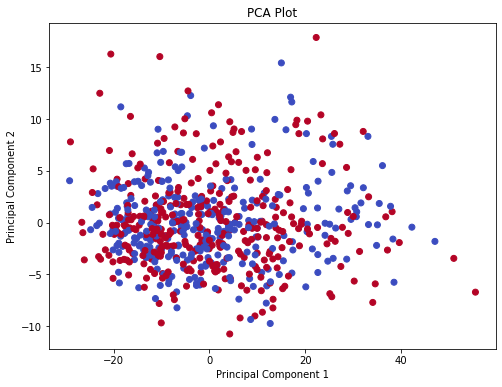

In [112]:
import matplotlib.pyplot as plt

# Plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Try understand approximate n_componenets number

In [114]:
# Dimension reduction
pca = PCA(n_components=0.95, svd_solver='full')  # n_components
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

[0.28950062 0.02390994 0.02313824 0.01696976 0.0143724  0.01299562
 0.01005824 0.00936592 0.00873646 0.00814841 0.00738381 0.00689604
 0.00666869 0.00653937 0.00643421 0.00578585 0.00558382 0.00548568
 0.0053381  0.00508119 0.00506604 0.00463878 0.00451718 0.00444414
 0.004337   0.0042202  0.00416059 0.00385051 0.00380867 0.00374633
 0.00366241 0.00356008 0.00351198 0.00337036 0.00334276 0.00327492
 0.00319846 0.00315908 0.00310982 0.00298726 0.00290909 0.00286272
 0.00285374 0.00279906 0.00275169 0.00270487 0.00264894 0.00260776
 0.00259327 0.00255374 0.00253473 0.00250187 0.00247968 0.00244889
 0.00241014 0.00239482 0.00234791 0.00233979 0.00231566 0.00226266
 0.0022387  0.00222129 0.00219023 0.00217513 0.00213289 0.00212686
 0.0020763  0.00204989 0.00202232 0.00199868 0.00198911 0.00196667
 0.0019414  0.00191849 0.00191611 0.00190355 0.00188156 0.00186246
 0.00185533 0.00183001 0.00181556 0.00180225 0.00179564 0.00177933
 0.0017538  0.00174581 0.00173308 0.00172052 0.00170156 0.0016